In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn import tree

# Exercise 1 : simple dataset with 2 features (same as previous TP)

## Load the data

In [2]:
# We will load the data that is in the file 'donnees_exo1.txt'
data = pd.read_csv('donnees_exo1.txt', sep = ' ')
data

,X1,X2,Y
0,-0.697580,0.684940,0
1,-0.478690,0.633770,1
2,0.057028,0.918860,0
3,-0.593890,0.494880,0
4,0.229840,-0.411550,1
...,...,...,...
113,0.460250,0.012427,1
114,-0.046659,0.816520,1
115,0.322000,0.692250,1
116,-0.524770,0.209800,1


## Train / Valid / Test split

In [3]:
data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)
# 82 examples in train, 18 in valid and 18 in test

## Plotting the training set

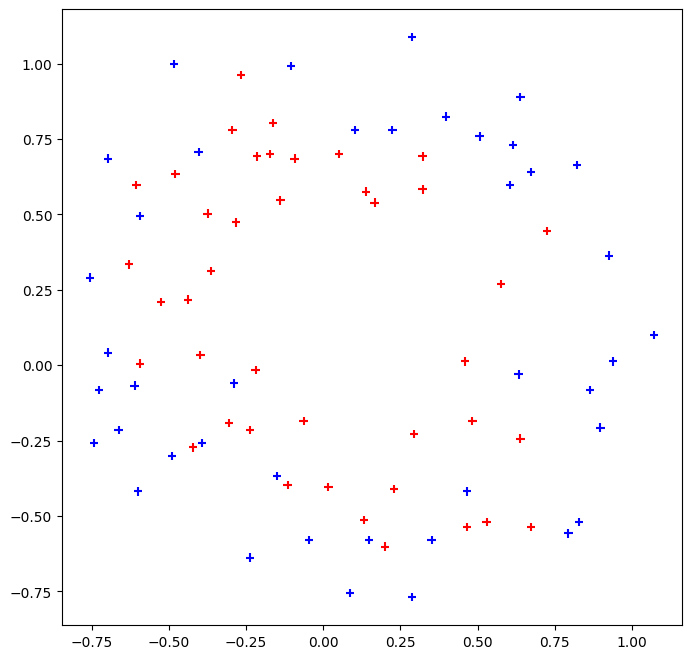

In [4]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c = data_train.Y, cmap = color_map, marker='+')

## Fitting a decision tree

In [6]:
# The basic decision tree can be obtained easily by this command
dt = tree.DecisionTreeClassifier().fit(data_train.iloc[:,:2],data_train.Y)
# More advanced options can be inserted into the 'DecisionTreeClassifier' function (we will see some later)
# The 'fit' function needs to have 2 parameters (at least) : 
# - the set of features describing the examples (here the 2 first columns of our train set)
# - the associated labels (classes, here the column 'Y' of our train set)


## Visualizing the obtained tree

[Text(0.6071428571428571, 0.9545454545454546, 'x[0] <= 0.76\ngini = 0.5\nsamples = 82\nvalue = [41, 41]'),
 Text(0.5595238095238095, 0.8636363636363636, 'x[0] <= -0.646\ngini = 0.494\nsamples = 74\nvalue = [33, 41]'),
 Text(0.5833333333333333, 0.9090909090909092, 'True  '),
 Text(0.5119047619047619, 0.7727272727272727, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6071428571428571, 0.7727272727272727, 'x[1] <= 0.703\ngini = 0.479\nsamples = 68\nvalue = [27, 41]'),
 Text(0.30952380952380953, 0.6818181818181818, 'x[1] <= -0.558\ngini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(0.09523809523809523, 0.5909090909090909, 'x[0] <= 0.175\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.047619047619047616, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= 0.244\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.09523809523809523, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.409090909090909

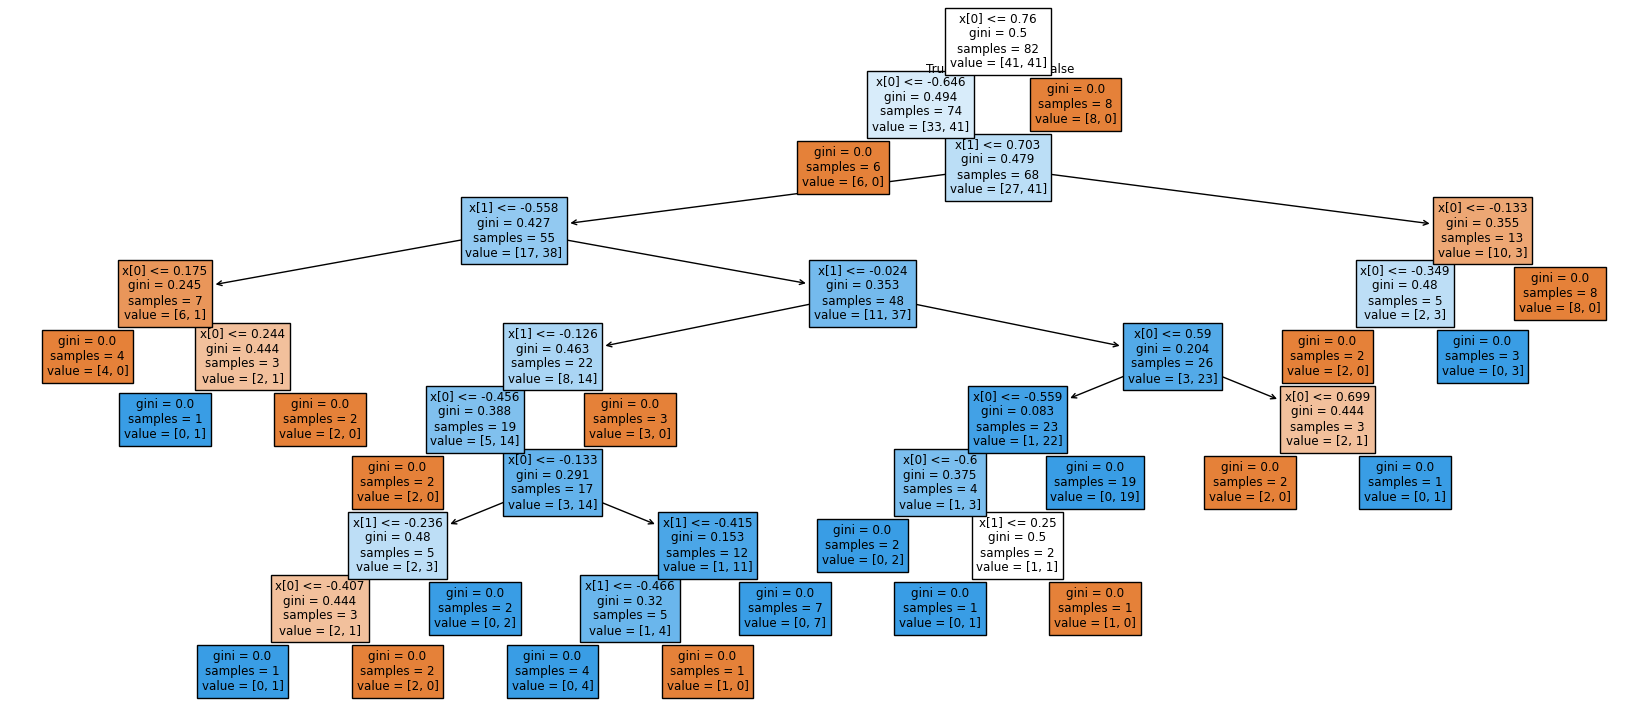

In [7]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt, filled=True)
# The 'plot_tree' function outputs two things : 
# - a text version of the tree (where are written the informations about all the nodes of the tree)
# - a graphical representation of the tree (right branches correspond to answer 'no' and left branches 'yes')

In [8]:
# Index Gini de la racine
root_gini = dt.tree_.impurity[0]
print("Index Gini de la racine:", root_gini)

# Nombre de feuilles dans l'arbre
n_leaves = dt.get_n_leaves()
print("Nombre de feuilles:", n_leaves)

Index Gini de la racine: 0.5
Nombre de feuilles: 22


In [9]:
# First example of the training set: features and class
first_example = data_train.iloc[0]
print("Features (X1, X2):", first_example[['X1', 'X2']].values)
print("Class (Y):", first_example['Y'])

# Prediction of the tree for the first example
predicted_class = dt.predict([first_example[['X1', 'X2']].values])[0]
print("Predicted class by the tree:", predicted_class)
print("Is the prediction correct?", predicted_class == first_example['Y'])

Features (X1, X2): [-0.66302 -0.21418]
Class (Y): 0.0
Predicted class by the tree: 0
Is the prediction correct? True


c:\FST\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
# We can obtain automatically the prediction of the tree for any example with the 'predict' command (as for logistic regression):
dt.predict(data_train.iloc[:1,:2]) # here I ask to predict the first example of the train set, need to give its features

array([0])

In [11]:
# Compute the performance score of the decision tree on the training set
train_score = dt.score(data_train.iloc[:, :2], data_train.Y)
print("Performance score on the training set:", train_score)

Performance score on the training set: 1.0


In [12]:
# Compute the performance score of the decision tree on the train_score_validation set
train_score_validation = dt.score(data_valid.iloc[:, :2], data_valid.Y)
print("Performance score on the validation set:", train_score_validation)

Performance score on the validation set: 0.8333333333333334


In [13]:
def draw_boundary_tree(model, data, x_min, x_max, y_min, y_max):
    h = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

c:\FST\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


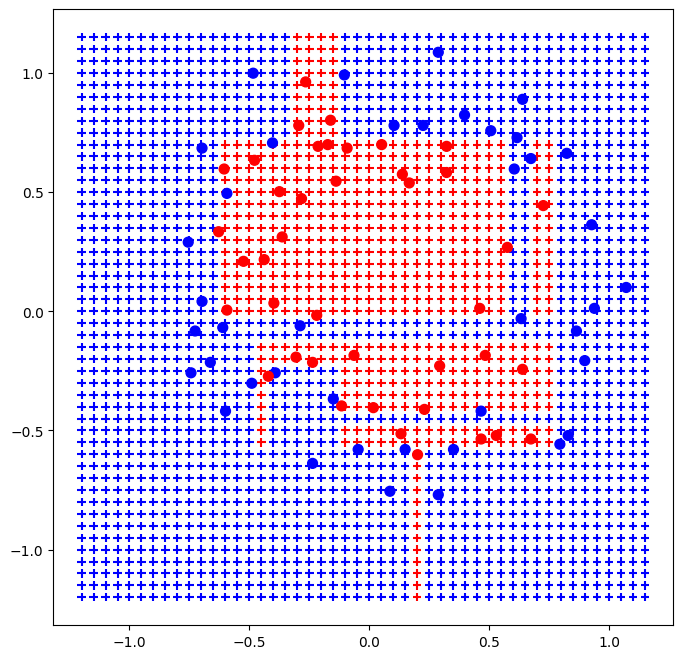

In [14]:
draw_boundary_tree(dt, data_train, -1.2, 1.2, -1.2, 1.2)

## Pruning the tree

In [15]:
clf = tree.DecisionTreeClassifier() # first declare a tree
path = clf.cost_complexity_pruning_path(data_train.iloc[:,0:2], data_train.Y) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
path

{'ccp_alphas': array([0.        , 0.0077766 , 0.01045296, 0.01117886, 0.01263351,
        0.01626016, 0.02513799, 0.02727425, 0.02814259, 0.05398197,
        0.05405405]),
 'impurities': array([0.        , 0.0233298 , 0.04423572, 0.06659345, 0.10449397,
        0.12075413, 0.14589213, 0.22771487, 0.28400004, 0.44594595,
        0.5       ])}

Text(0, 0.5, 'total impurity of leaves')

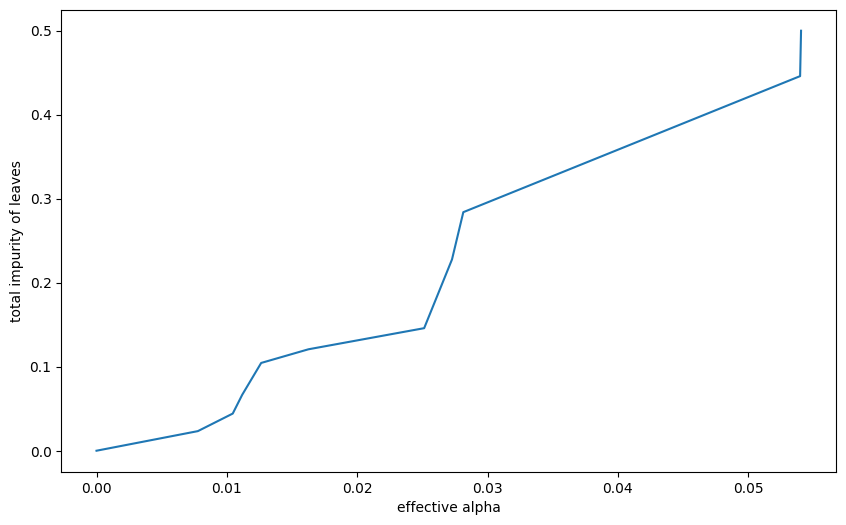

In [16]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [17]:
dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,0:2], data_train.Y)
# Here I asked for the third value from all the possible alpha (the first one is 0, already done with the basic tree)

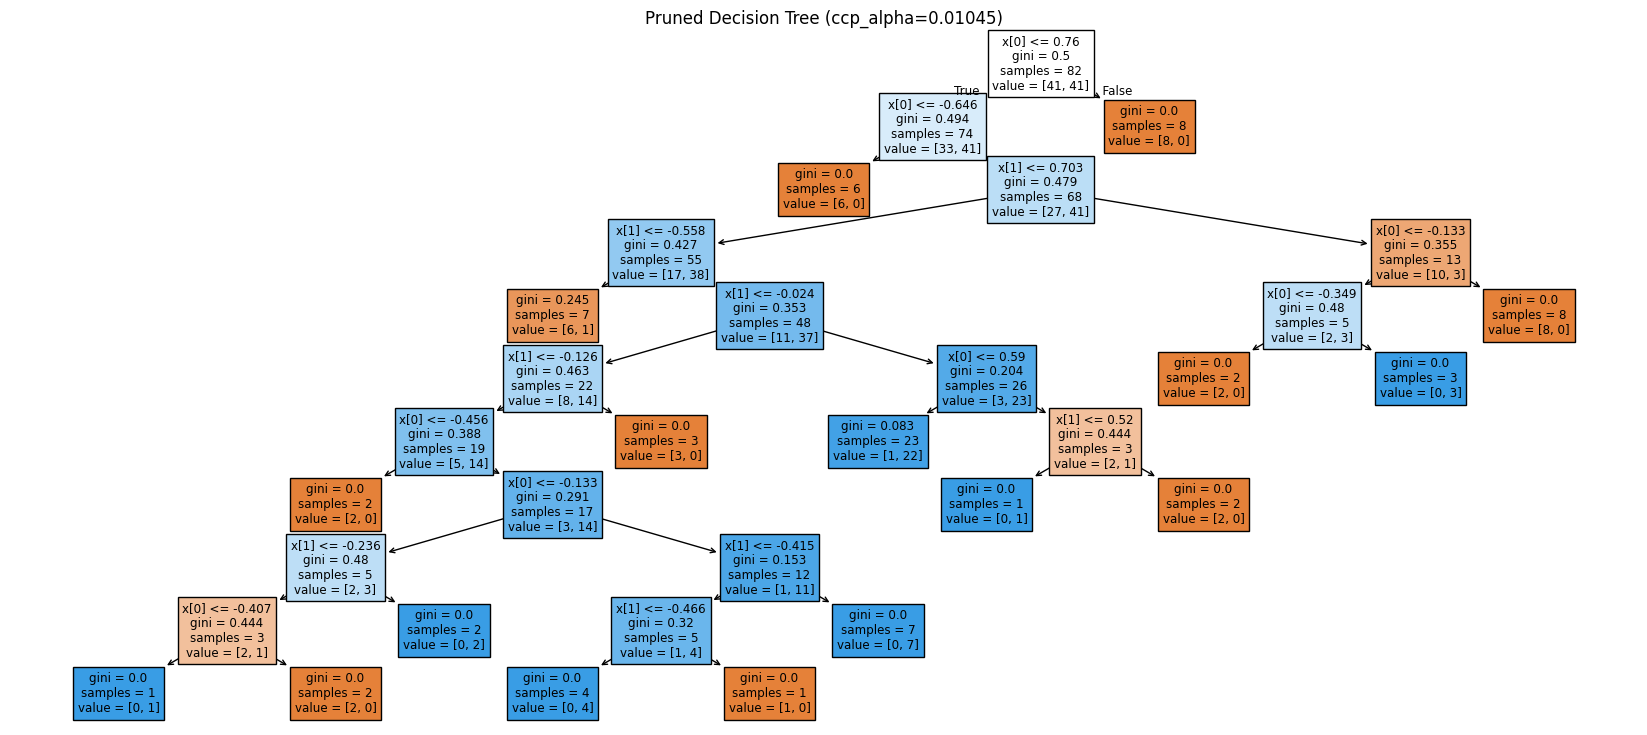

c:\FST\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


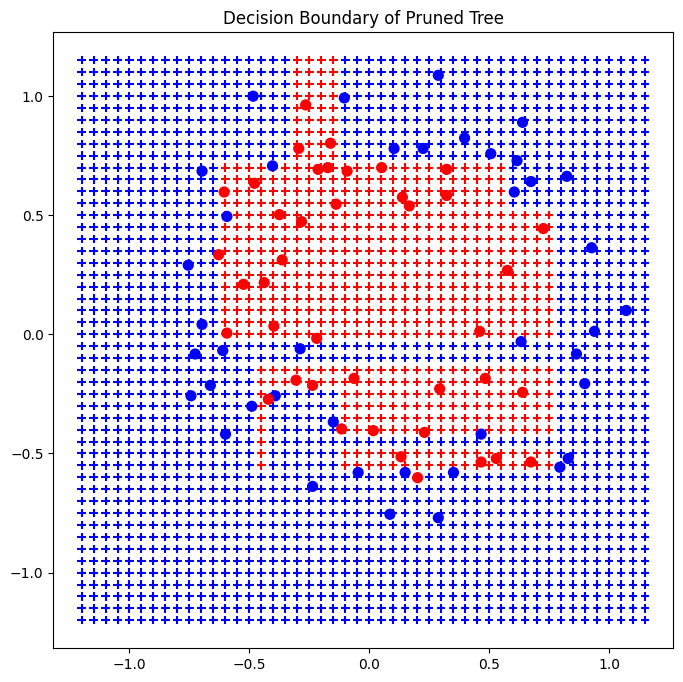

Performance on training set (pruned tree): 0.975609756097561
Performance on validation set (pruned tree): 0.8333333333333334


In [18]:
# Plot the pruned tree (should show impure leaves)
plt.figure(figsize=(21, 9))
tree.plot_tree(dt_pruned, filled=True)
plt.title("Pruned Decision Tree (ccp_alpha={:.5f})".format(path.ccp_alphas[2]))
plt.show()

# Visualize the decision boundary of the pruned tree
draw_boundary_tree(dt_pruned, data_train, -1.2, 1.2, -1.2, 1.2)
plt.title("Decision Boundary of Pruned Tree")
plt.show()

# Compute performance on training set
train_score_pruned = dt_pruned.score(data_train.iloc[:, :2], data_train.Y)
print("Performance on training set (pruned tree):", train_score_pruned)

# Compute performance on validation set
valid_score_pruned = dt_pruned.score(data_valid.iloc[:, :2], data_valid.Y)
print("Performance on validation set (pruned tree):", valid_score_pruned)

La frontière est plus lissée et simplifiée, avec moins de découpages fins.

L’élagage réduit la complexité de l’arbre → meilleure généralisation sur de nouvelles données.

le premier arbre apprend trop de détails spécifiques, tandis que le second cherche un compromis entre précision et capacité de généralisation.

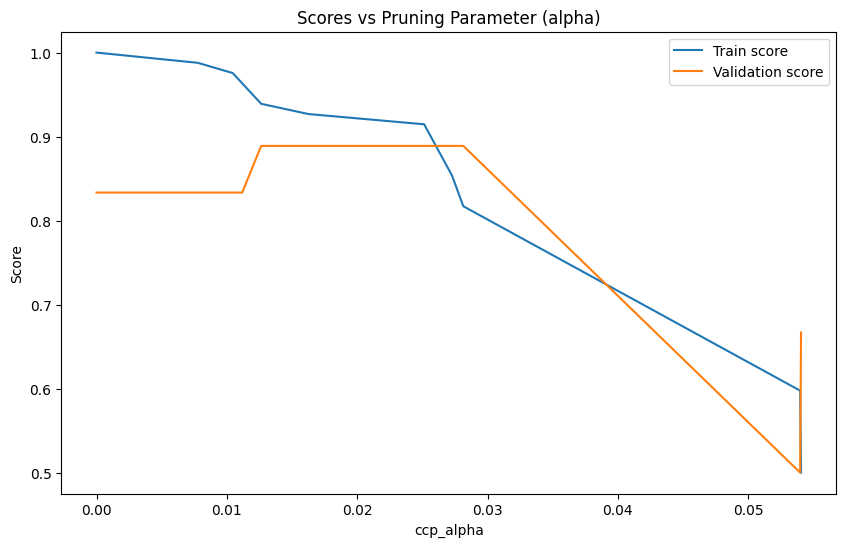

Best alpha: 0.012633508688028058
Best validation score: 0.8888888888888888


c:\FST\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


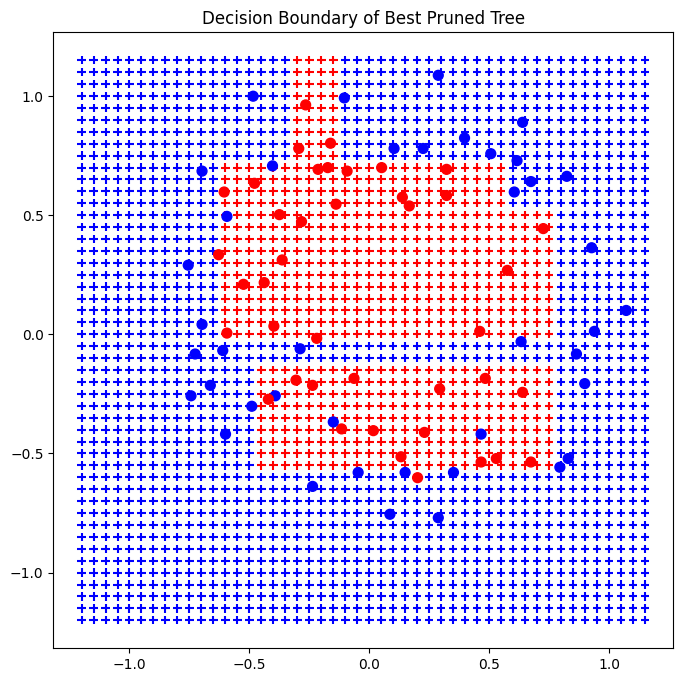

Generalization error estimate (on test set): 0.16666666666666663


In [18]:
# For loop on alpha values: compute scores on train and validation sets
train_scores = []
valid_scores = []
trees = []

for alpha in path.ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=alpha)
    clf.fit(data_train.iloc[:, :2], data_train.Y)
    train_scores.append(clf.score(data_train.iloc[:, :2], data_train.Y))
    valid_scores.append(clf.score(data_valid.iloc[:, :2], data_valid.Y))
    trees.append(clf)

# Plot scores vs alpha
plt.figure(figsize=(10, 6))
plt.plot(path.ccp_alphas, train_scores, label='Train score')
plt.plot(path.ccp_alphas, valid_scores, label='Validation score')
plt.xlabel('ccp_alpha')
plt.ylabel('Score')
plt.legend()
plt.title('Scores vs Pruning Parameter (alpha)')
plt.show()

# Choose the tree with the highest validation score
best_idx = np.argmax(valid_scores)
best_alpha = path.ccp_alphas[best_idx]
best_tree = trees[best_idx]
print("Best alpha:", best_alpha)
print("Best validation score:", valid_scores[best_idx])

# Draw its decision boundary
draw_boundary_tree(best_tree, data_train, -1.2, 1.2, -1.2, 1.2)
plt.title("Decision Boundary of Best Pruned Tree")
plt.show()

# Estimate generalization error (using test set)
test_score = best_tree.score(data_test.iloc[:, :2], data_test.Y)
generalization_error = 1 - test_score
print("Generalization error estimate (on test set):", generalization_error)

Lorsque ccp_alpha = 0, l’arbre surapprend (train score très haut, validation plus bas). En augmentant légèrement ccp_alpha, l’élagage améliore la généralisation (validation score maximal). Si ccp_alpha est trop grand, l’arbre sous-apprend et les deux scores chutent.

# Exercise 2 : with a real dataset of handwritten digits

In [19]:
mnist = pd.read_csv('cp_sample.csv', sep=';')
mnist.shape

(1000, 785)

In [21]:
# Distribution of labels in the mnist dataset
label_distribution = mnist['label'].value_counts()
print(label_distribution)

label
2    121
1    113
4    104
3    100
8    100
0     97
7     94
6     91
5     91
9     89
Name: count, dtype: int64


In [22]:
# The values of pixels and label for one image can be obtained by the command:
mnist.iloc[0,:] # First image of the dataset
# You can see that the label is in the column 'label' and the other columns are pixel0, pixel1, etc...
# This first image represents the digit 1

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

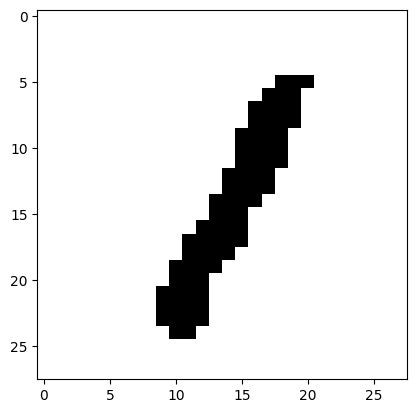

In [23]:
# It is possible to see an image from its pixel values using the following command:
plt.imshow(mnist.iloc[0,1:].to_numpy().reshape(28,28),cmap = 'Greys')
# Here is the first image, representing a 1

In [24]:
# Split the mnist dataset into train, validation, and test sets
mnist_train, mnist_test = train_test_split(mnist, test_size=0.3, random_state=42)
mnist_valid, mnist_test = train_test_split(mnist_test, test_size=0.5, random_state=42)

print("Train set size:", mnist_train.shape)
print("Validation set size:", mnist_valid.shape)
print("Test set size:", mnist_test.shape)

Train set size: (700, 785)
Validation set size: (150, 785)
Test set size: (150, 785)


In [32]:
# Fit a decision tree to the MNIST training set
dt_mnist = tree.DecisionTreeClassifier().fit(mnist_train.iloc[:, 1:], mnist_train['label'])

# Prediction score on the training set
train_score_mnist = dt_mnist.score(mnist_train.iloc[:, 1:], mnist_train['label'])

# Prediction score on the validation set
valid_score_mnist = dt_mnist.score(mnist_valid.iloc[:, 1:], mnist_valid['label'])

print("Prediction score on the training set:", train_score_mnist)
print("Prediction score on the validation set:", valid_score_mnist)

Prediction score on the training set: 1.0
Prediction score on the validation set: 0.62


In [ ]:
# Get all possible ccp_alpha values for pruning
clf_mnist = tree.DecisionTreeClassifier()
path_mnist = clf_mnist.cost_complexity_pruning_path(mnist_train.iloc[:, 1:], mnist_train['label'])
ccp_alphas_mnist = path_mnist.ccp_alphas



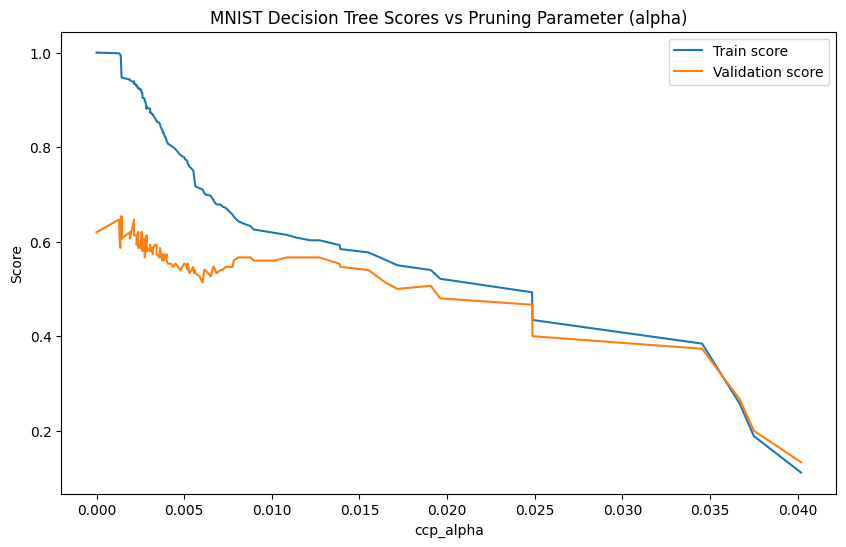

In [ ]:
# Stocker les scores pour chaque arbre élaguétrain_scores_mnist = []
valid_scores_mnist = []
trees_mnist = []

for alpha in ccp_alphas_mnist:
    clf = tree.DecisionTreeClassifier(ccp_alpha=alpha)
    clf.fit(mnist_train.iloc[:, 1:], mnist_train['label'])
    train_scores_mnist.append(clf.score(mnist_train.iloc[:, 1:], mnist_train['label']))
    valid_scores_mnist.append(clf.score(mnist_valid.iloc[:, 1:], mnist_valid['label']))
    trees_mnist.append(clf)
    
# Plot scores vs alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_mnist, train_scores_mnist, label='Train score')
plt.plot(ccp_alphas_mnist, valid_scores_mnist, label='Validation score')
plt.xlabel('ccp_alpha')
plt.ylabel('Score')
plt.legend()
plt.title('MNIST Decision Tree Scores vs Pruning Parameter (alpha)')
plt.show()

In [ ]:
# Sélectionnez l'arbre ayant le score de validation le plus élevé
best_idx_mnist = np.argmax(valid_scores_mnist)
best_alpha_mnist = ccp_alphas_mnist[best_idx_mnist]
best_tree_mnist = trees_mnist[best_idx_mnist]

print("Best alpha:", best_alpha_mnist)
print("Score on training set:", train_scores_mnist[best_idx_mnist])
print("Score on validation set:", valid_scores_mnist[best_idx_mnist])

# Estimer l'erreur de generalisation en utilisant l'ensemble de test
test_score_mnist = best_tree_mnist.score(mnist_test.iloc[:, 1:], mnist_test['label'])
generalization_error_mnist = 1 - test_score_mnist
print("Generalization error estimate (on test set):", generalization_error_mnist)

Best alpha: 0.0014285714285714286
Score on training set: 0.9471428571428572
Score on validation set: 0.6533333333333333
Generalization error estimate (on test set): 0.4066666666666666


## Trying the model on your own written image 

In [35]:
import skimage.io
def read_myimage(f):
    myimage = skimage.io.imread(f, as_gray=True)
    i0 = np.where(myimage==0)
    i1 = np.where(myimage == 1)
    myimage[i0] = 1
    myimage[i1] = 0
    plt.imshow(myimage, cmap='Greys')
    return myimage.reshape(1,28*28)

ModuleNotFoundError: No module named 'skimage'

array([7])

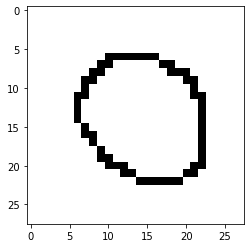

In [ ]:
myim = read_myimage('test_0.png')
dt.predict(myim) # if dt is the name of your model

## Logistic regression for the same task

# Using HOG representation rather than pixel values

In [ ]:
from skimage.feature import hog

In [ ]:
myimage = mnist.iloc[0,1:] # first image of the mnist dataset (784 pixel values)
myimage_hog = hog(myimage.to_numpy().reshape(28,28,1), orientations=8, pixels_per_cell=(14,14), cells_per_block=(1,1))
myimage_hog

array([0.70710678, 0.        , 0.70710678, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.63453054, 0.        ,
       0.63453054, 0.        , 0.44129581, 0.        , 0.        ,
       0.        , 0.59539679, 0.        , 0.59539679, 0.        ,
       0.23002187, 0.        , 0.48795006, 0.        , 0.70710678,
       0.        , 0.70710678, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1))))

In [ ]:
hog_train = data_train.apply(my_hog, axis=1, args=(8,14))
hog_valid= data_valid.apply(my_hog, axis=1, args=(8,14))
hog_test = data_test.apply(my_hog, axis=1, args=(8,14))
hog_train['label'] = data_train.label
hog_valid['label'] = data_valid.label
hog_test['label'] = data_test.label

In [ ]:
hog_train
# you see here that each image of the training set is now a vector of length 32

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,label
715,0.502681,0.0,0.502681,0.0,0.491869,0.0,0.502681,0.0,0.331770,0.0,...,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,8
920,0.699372,0.0,0.699372,0.0,0.147506,0.0,0.000000,0.0,0.500000,0.0,...,0.0,0.681478,0.0,0.681478,0.0,0.000000,0.0,0.266785,0.0,9
295,0.465444,0.0,0.618883,0.0,0.618883,0.0,0.131647,0.0,0.500000,0.0,...,0.0,0.307510,0.0,0.543607,0.0,0.552236,0.0,0.552236,0.0,2
83,0.517744,0.0,0.517744,0.0,0.517744,0.0,0.442518,0.0,0.568812,0.0,...,0.0,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,0
942,0.604642,0.0,0.604642,0.0,0.377247,0.0,0.355672,0.0,0.603838,0.0,...,0.0,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,0.555912,0.0,...,0.0,0.572579,0.0,0.572579,0.0,0.572579,0.0,0.128290,0.0,0
709,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.615943,0.0,...,0.0,0.656532,0.0,0.754298,0.0,0.000000,0.0,0.000000,0.0,1
439,0.707107,0.0,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.566947,0.0,...,0.0,0.558947,0.0,0.558947,0.0,0.558947,0.0,0.250470,0.0,0
174,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.197028,0.0,...,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,5
